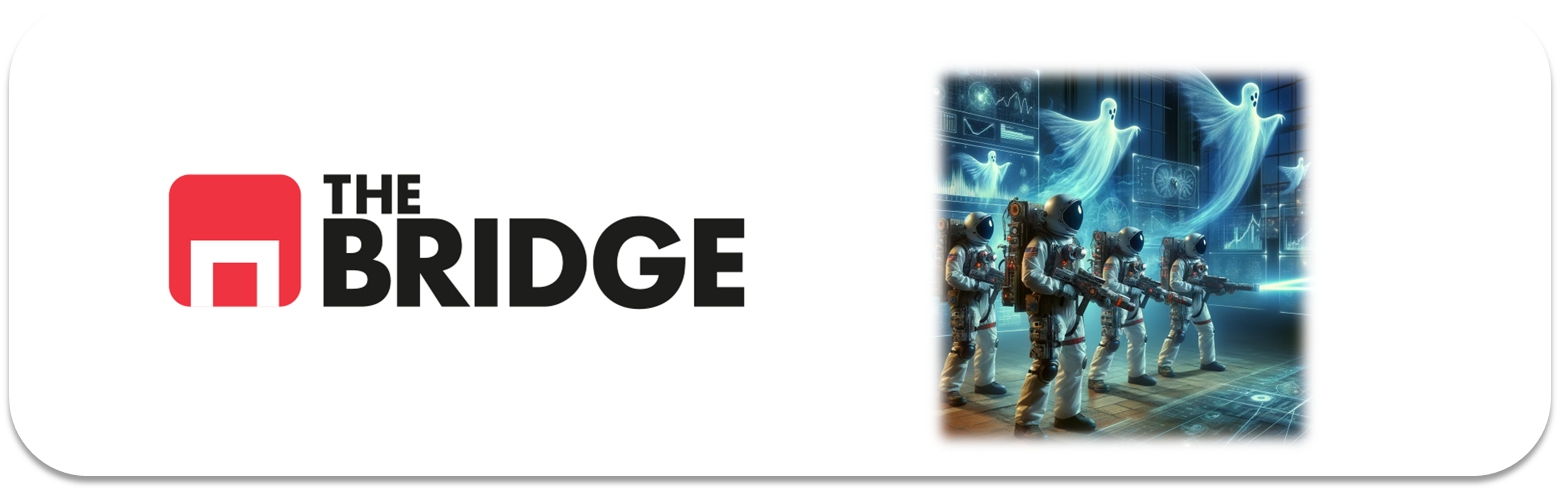

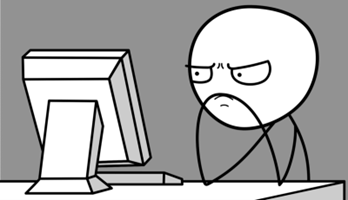

Para ejercitarte y afianzar lo aprendido sobre **Series Temporales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### El "problema"

Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pmdarima.arima import ARIMA, auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Ejercicio 1

Carga los datos y adecúa el dataset teniendo en cuenta que es una serie temporal. Para ello convierte la columna de fecha al formato adecuado y luego úsala como índice.

In [2]:
df = pd.read_csv("./data/AirPassengers.csv")
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").set_index("date")
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Ejercicio 2

¿De qué fecha a qué fecha va el histórico?¿Qué periodicidad tiene la serie?

In [5]:
init = "1949-01-01"
end = "1960-12-01"
mid = "1955-12-01"

*Periodicidad mensual.*

### Ejercicio 3

¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad? Analiza de manera gráfica, pero todavía sin descomponer la serie.

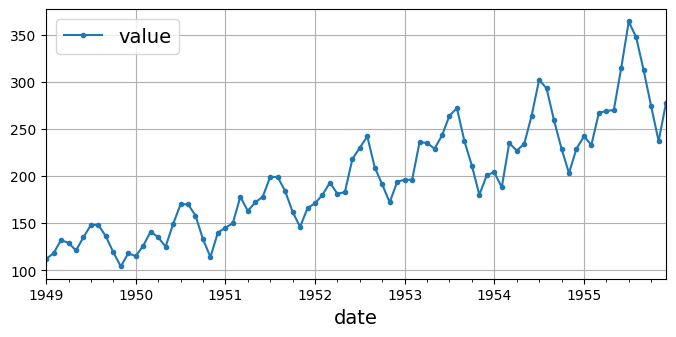

In [6]:
df[init:mid].plot(grid = True, marker = ".", figsize = (8, 3.5))
plt.show()

### Ejercicio 4

¿Podrías demostrar de dos maneras estadísticas que la serie no es estacionaria?

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'].values)
result[1]

0.991880243437641

### Ejercicio 5

Emplea la descomposición que hemos aprendido en el workout para representar gráficamente la tendencia. Si has mostrado gráficamente la tendencia en el ejercicio 3, compara ambos.

In [15]:
period = slice(init, mid)
# df_monthly = df["value"].resample('M').mean()  # Para mostrar año a año lo vamos a hacer con las medias mensuales, esta es la forma en que pandas permite hacerlo cuando tienes un indice que es tipo DateTime
rolling_average_12_months = df[period].rolling(window = 12).mean()

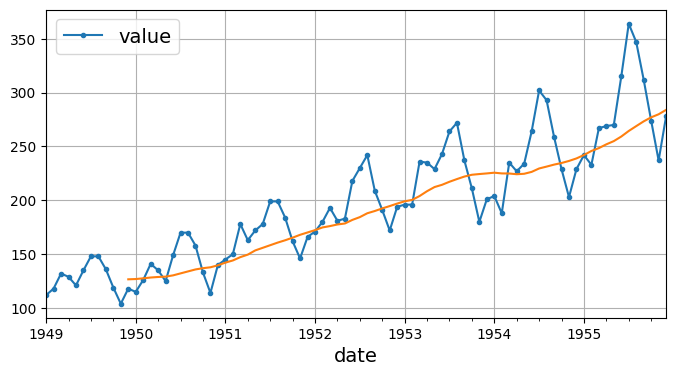

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
df[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)
# extra code – saves the figure for the book
plt.show();

### Ejercicio 6

Visualiza todos los componentes de la serie temporal por separado

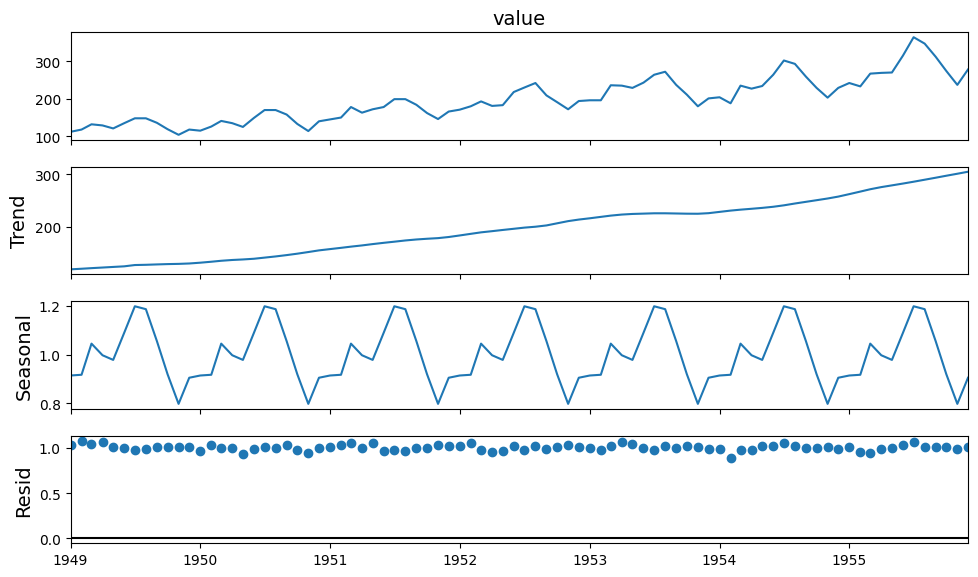

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df[init:mid]['value'], model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
result_add = seasonal_decompose(df[init:mid]['value'], model = 'additive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,6)})
result_mul.plot();

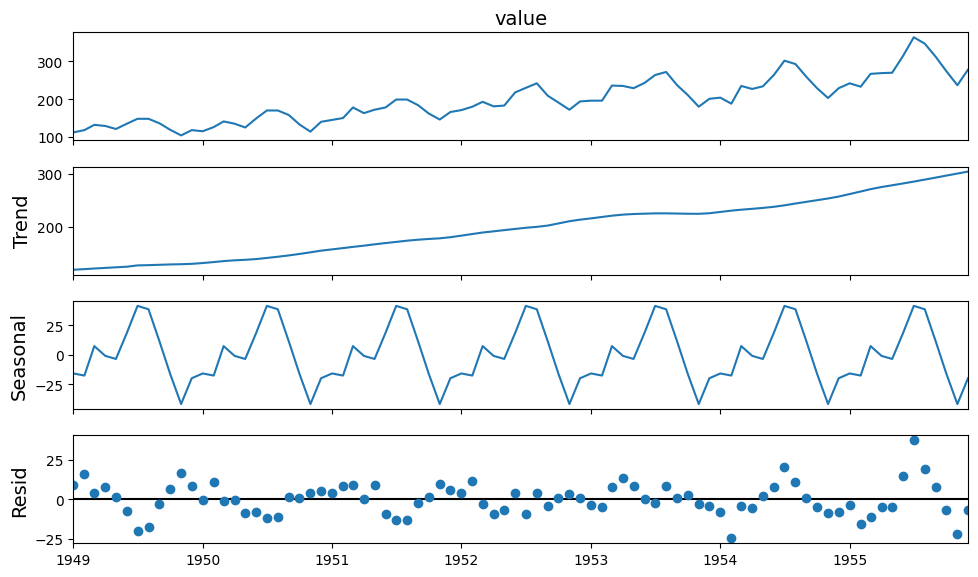

In [12]:
result_add.plot();

### Ejercicio 7

Crea una matriz de correlación con los últimos 24 instantes (matriz de autocorrelación). Crea un dataframe con shift de 1 a 24 para ello, la idea es que puedas hacer una matriz de correlación con el valor actual y los 24 valores anteriores. Es decir de un mes con sus 23 meses anteriores. Interpreta la estacionalidad

In [18]:
df_lagged = df.copy()

In [20]:
for i in range(1, 25):
    df_lagged[f'lag_{i}'] = df_lagged['value'].shift(i)

In [22]:
df_lagged.dropna(inplace=True)

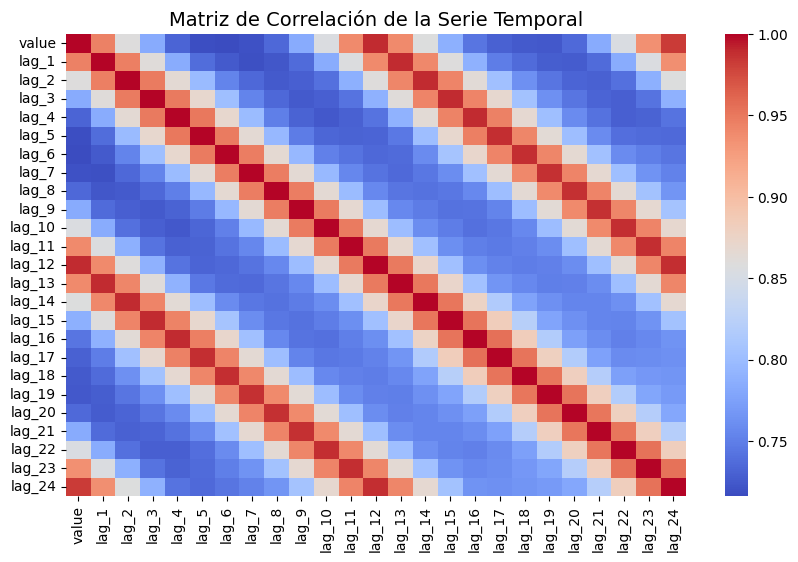

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_lagged.corr(), cmap="coolwarm")
plt.title("Matriz de Correlación de la Serie Temporal")
plt.show()

### Ejercicio 8
Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

*Se cumple cada 12 meses.*

### Ejercicio 9

 Divide en train y test. En este caso no haremos división en validación, entre otras razones por la cantidad de datos que tenemos. Guarda 20 muestras para test.

In [31]:
X_train = df[init:"1959-03-01"]
X_test = df["1959-04-01":end]

### Ejercicio 10

Pon en práctica lo visto en clases, crea un modelo de ARIMA (puedes utilizar autoarima), mide su RMSE y su MAPE. Comparalo gráficamente con los valores reales.

In [32]:
from pmdarima.arima import auto_arima

model = auto_arima(X_train,
                   start_p = 0,
                   start_q = 0,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   m = 12,
                   trace= True,
                   stepwise = False)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=933.691, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=935.684, Time=0.55 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=937.681, Time=0.78 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=935.684, Time=0.67 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=937.684, Time=0.79 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=939.683, Time=2.26 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=937.682, Time=2.04 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=939.678, Time=1.95 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=4.42 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=881.948, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=883.104, Time=0.75 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=885.054, Time=1.25 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=883.154, Time=1.08 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=885.058, Time=2.78 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=887.055, Time=2.75 sec
 ARIMA(0,0,1)(

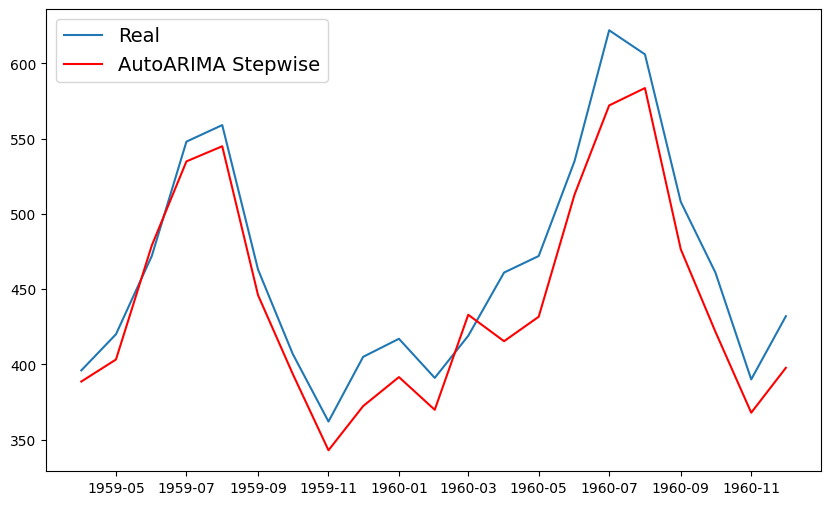

In [38]:
y_pred = model.predict(21)
y_test = X_test
plt.plot(y_test, label = "Real")
plt.plot(y_pred, color = 'red', label = "AutoARIMA Stepwise")
plt.legend();

In [39]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred) * 100)

RMSE: 27.039704758939727
MAPE: 5.24157331080677


### Ejercicio 11

Haz lo mismo que en el ejercicio 10 pero con un modelo SARIMA. ¿Cuál es mejor y por qué?